# **Final Project**

- **<font color = maroon size = "4">Marketing Analytics DAB 303</font>**
- **<font color = maroon size = "4">Prepared by - Hardeep Kaur, Yash Agrawal, Kshitij Segal</font>**
- **<font color = maroon size = "4">Under the guidance of - Professor Manjari Maheshwari and Professor Muhammad Anwar Shahid</font>**

## **Introduction**
**<font size="4">_In this project, we are working on Instacart dataset. As per the description shared on [Kaggle](https://www.kaggle.com/c/instacart-market-basket-analysis/overview), Instacart open sourced this data - see their blog post on [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)._</font>**    

**<font size="4">_Our objective is to analyze this dataset and to provide insights in the form of:_</font>**     

**<font size="4">1. Exploratory Data Analysis</font>**    
**<font size="4">2. Customer Segmentation on Instacart dataset</font>**     
**<font size="4">3. Classification Model to Predict whether a customer will reorder or not</font>**     

## **Data Dictionary**
**<font size="3.5">Each entity (customer, product, order, aisle, etc.) has an associated unique id.</font>**     
- aisles.csv
- departments.csv
- order_products__prior.csv
- orders.csv
- products.csv

**Detailed Description:** https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b



## **Task**
**<font size="4">In this notebook, we are building Classification Model to predict whether a customer will reorder or not.</font>**   

In [1]:
#Import Standard Libraries
import pandas as pd #For dataframe manipulations
import numpy as np #For numerical calculations
import matplotlib.pyplot as plt #For plotting and visualization
import seaborn as sns #For plotting and visualization
%matplotlib inline

from warnings import filterwarnings #To ignore warnings
filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, LabelEncoder #For preprocessing of dataframe and label encoding
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, cross_val_score #For split of dataframe and cross validation
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix #For measure of performance

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #To build Classification Models.

In [2]:
orders = pd.read_csv("orders.csv") #Read Orders data
orders.head() #View first five rows of dataframe

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [3]:
aisles = pd.read_csv("aisles.csv") #Read Aisles data
aisles.head() #View first five rows of dataframe

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
dept = pd.read_csv("departments.csv") #Read Departments data
dept.head() #View first five rows of dataframe

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
products = pd.read_csv("products.csv") #Read Products data
products.head() #View first five rows of dataframe

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
order_products = pd.read_csv("order_products__prior.csv") #Read Order_Products prior data
order_products.head() #View first five rows of dataframe

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
#View the shapes of all the dataframes
print(orders.shape)
print(aisles.shape)
print(dept.shape)
print(products.shape)
print(order_products.shape)

(3421083, 7)
(134, 2)
(21, 2)
(49688, 4)
(32434489, 4)


In [8]:
#View the count of NaN in all the dataframes

print(f"Table Orders:\n{orders.isna().sum()}\n")
print(f"Table Aisles:\n{aisles.isna().sum()}\n")
print(f"Table Department:\n{dept.isna().sum()}\n")
print(f"Table Products:\n{products.isna().sum()}\n")
print(f"Table Order_Products:\n{order_products.isna().sum()}\n")

Table Orders:
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

Table Aisles:
aisle_id    0
aisle       0
dtype: int64

Table Department:
department_id    0
department       0
dtype: int64

Table Products:
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Table Order_Products:
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64



**<font size="4">_In the succeeding code cells, we will be merging all the dataframes into one dataframe. This will be done by performing inner join on the unique ID columns._</font>**

In [9]:
#Merging all the dataframes into one

temp_1 = pd.merge(order_products, products, on=['product_id', 'product_id'])
temp_2 = pd.merge(temp_1, dept, on=['department_id','department_id'])
temp_3 = pd.merge(temp_2, aisles, on=['aisle_id','aisle_id'])
df = pd.merge(temp_3, orders, on=['order_id','order_id']) #Final Dataframe

In [10]:
#Sort all the columns by user_id, order_id, and then product_id in ascending order

df.sort_values(by=['user_id', 'order_id', 'product_id'], ascending=True, inplace=True)
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)
df.head() #View the dataset

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,431534,196,1,1,Soda,77,7,beverages,soft drinks,1,prior,5,4,15,28.0
1,431534,10258,3,1,Pistachios,117,19,snacks,nuts seeds dried fruit,1,prior,5,4,15,28.0
2,431534,10326,5,0,Organic Fuji Apples,24,4,produce,fresh fruits,1,prior,5,4,15,28.0
3,431534,12427,2,1,Original Beef Jerky,23,19,snacks,popcorn jerky,1,prior,5,4,15,28.0
4,431534,13176,8,1,Bag of Organic Bananas,24,4,produce,fresh fruits,1,prior,5,4,15,28.0


In [11]:
df.shape #View the shape of the merged dataset

(32434489, 15)

In [12]:
#Evaluate NaN values
df.isna().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
department                      0
aisle                           0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

**<font size="4">Since, we have huge amount of data, we can drop the rows which have null values in them.</font>**

In [13]:
df.dropna(inplace=True) #Drop NaN data rows
df.reset_index(inplace=True) #Reset the indices
df.drop(['index'], axis=1, inplace=True) #Drop the column 'index'

In [14]:
#View the shape of dataframe
df.shape

(30356421, 15)

In [15]:
#View the dataset
df.head(2)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,431534,196,1,1,Soda,77,7,beverages,soft drinks,1,prior,5,4,15,28.0
1,431534,10258,3,1,Pistachios,117,19,snacks,nuts seeds dried fruit,1,prior,5,4,15,28.0


In [16]:
df.info() #Display the information related to the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30356421 entries, 0 to 30356420
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   department              object 
 8   aisle                   object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 3.4+ GB


### **Observations**    
**<font size="3.9">Here, we have columns of type object. We have to transform these columns to numeric format before training the model.</font>**

In [17]:
df.select_dtypes('object').columns #Identify the columns of datatype object

Index(['product_name', 'department', 'aisle', 'eval_set'], dtype='object')

In [18]:
#Convert the categorical data into numeric data. These categories are Nominal in nature. 
#These can be converted using .astype('category').cat.codes

df['product_name'] = df['product_name'].astype('category').cat.codes
df['department'] = df['department'].astype('category').cat.codes
df['aisle'] = df['aisle'].astype('category').cat.codes

In [19]:
df.head() #View the dataset

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,431534,196,1,1,41291,77,7,3,117,1,prior,5,4,15,28.0
1,431534,10258,3,1,35000,117,19,20,88,1,prior,5,4,15,28.0
2,431534,10326,5,0,29963,24,4,19,50,1,prior,5,4,15,28.0
3,431534,12427,2,1,32715,23,19,20,103,1,prior,5,4,15,28.0
4,431534,13176,8,1,3470,24,4,19,50,1,prior,5,4,15,28.0


**<font size="4">_Since, our dataset is very large in size, this will degrade the performance of our kernel. In order to train the models, we can pick random sample from the dataset and can train the model on that sample._</font>**     
**<font size="4">_Another reason why are we doing this is that this will boost in-memory computation while training the model._</font>**    


In [20]:
#In this code cell, we have picked 3.3% sample from our total population
data = df.sample(frac=0.033, replace=True, random_state=1) 

In [21]:
data.shape #View the shape of the sample

(1001762, 15)

**<font size="3.9">_Our target column is 'reordered'_</font>**

In [22]:
data['reordered'].value_counts() #View the distribution of classes in target variable

1    632264
0    369498
Name: reordered, dtype: int64

### **Model Building**
**<font size="3.5">eval_set has no significance. We can get rid of this column.</font>**

In [23]:
X = data.drop(['reordered','eval_set'], axis=1) #Create feature array
y = data.reordered #Create target variable array

In [24]:
X.shape #View shape of features

(1001762, 13)

In [25]:
y.shape #View shape of target

(1001762,)

## **Random Forest Classifier Model**

In [26]:
# In order to split data into train, validation and test sets
# We'll be performing train_test_split twice. First, we'll split the data into train:test ratio of 80:20
# Further, we'll be splitting 80% of training data into 65% of training and 15% of validation set data.

#Split data into train and test
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size = 0.2, random_state=1) 
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = 0.1875, random_state=1)

**<font size="3.5">For this model, we'll be using validation set to tune the hyperparameters.</font>**

In [27]:
#Define number of trees and K folds
n_trees = range(5,13,6)
k_fold = range(2,5)

#Initialize placeholder variables to determine the best parameters of the model
best_score=0
scores_val=[]
number_trees=[]

#Loop for Model Creation and Evaluation
for i in n_trees:
    #Loop for K Fold
    #for j in k_fold:
        rfc = RandomForestClassifier(n_estimators = i, random_state=1) # Invooke RandomForestClassifier model 
        rfc.fit(X_train, y_train) # Fit the model
        #print(f"Display Results for K Fold: {j}") #Print the results for K Folds
        print("Tree #:",i,cross_val_score(rfc, X_train, y_train, cv=2)) # Display Cross Val Scores for different number of Trees
        
        # Evaluation of Mean Accuracy of Training Set
        print("Mean Accuracy for Training Set is: ", round(sum(cross_val_score(rfc, X_train, y_train, cv=4)/4)*100,2),"%") 
        score = rfc.score(X_val, y_val) # Evaluation of model on validation set
        print(f"Accuracy Score on Validation Set is {100*score:.2f}%\n") # Display the accuracies on validation set
        scores_val.append(score) # append the scores to an array
        if score >= best_score: # if statement to determine the best parameters of the model
            best_score=score
            best_params={'n_estimators' : i}
            
print("***********************************************")
print("All Validation Scores:",scores_val) # display all validation set accuracies
print(f"\nBest Accuracy Score: {100*best_score:.2f}%") # display the best accuracy on validation set

# display the parameters that generated the best accuracy on validation set
print(f"Best Parameters for Random Forest Classfier: {best_params}") 

Tree #: 5 [0.66988255 0.67203875]
Mean Accuracy for Training Set is:  67.41 %
Accuracy Score on Validation Set is 67.69%

Tree #: 11 [0.69179168 0.69237527]
Mean Accuracy for Training Set is:  69.48 %
Accuracy Score on Validation Set is 69.65%

***********************************************
All Validation Scores: [0.6768642065683959, 0.6964762253352411]

Best Accuracy Score: 69.65%
Best Parameters for Random Forest Classfier: {'n_estimators': 11}


**<font size="3.5">_Best Parameters have n_estimators=11. We'll be building our model on this parameter._</font>**

### **Evaluation of RFC Model on Test Set**

In [28]:
# Test Set - Model Accuracy
rfc_best = RandomForestClassifier(**best_params, random_state=1) # Implementation of the model with best parameters
rfc_best.fit(X_train, y_train) # Fit the model
score = rfc_best.score(X_test, y_test) # Evaluate the model on test set
           
print(f"Accuracy Score: {100*score:.2f}%") # display the accuracies on test set

Accuracy Score: 69.67%


**<font size="3.5">_Using RFC model, accuracy on training set is around ~70%_</font>**

### **Confusion Matrix for Random Forest Classifier Model**

<Figure size 1080x864 with 0 Axes>

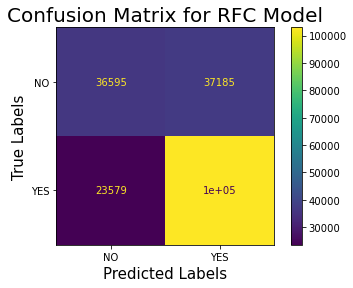

In [29]:
plt.figure(figsize=(15,12)) # Set the size of the plot
plot_confusion_matrix(rfc_best, X_test, y_test, display_labels=["NO","YES"]) # Plot the confusion Matrix
plt.title("Confusion Matrix for RFC Model", size=20) # Set the title of the plot
plt.xlabel("Predicted Labels", size=15) # Set x axis label
plt.ylabel("True Labels", size=15) # Set y axis label
plt.show() # Show the plot

**<font size="4">_This model has optimum performance on test set. However, we will be building another model which is Gradient Boosting Classifier Model in the below code cells._</font>**

## **Gradient Boosting Classifier**

In [30]:
#Declare training and test arrays
#train_accuracies = []
#test_accuracies = []

#Initialize the ranges for maximum depth, maximum leaf nodes and minimum samples leaf.
depth=range(5,7,2)
leaf_node=range(10,16,5)
sample_leaf=range(10,15,5)

best_score=0

#For loop to build and fit the model
for i in depth:
    for j in leaf_node:
        for k in sample_leaf:
            #Build the model
            gbc = GradientBoostingClassifier(max_depth=i, max_leaf_nodes=j, min_samples_leaf=k, random_state=1)
            
            #Fit the model
            gbc.fit(X_train, y_train)
            
            #Evaluate and display the accuracies for training and test data
            accuracy_train = gbc.score(X_train, y_train)
            accuracy_val = gbc.score(X_val, y_val)
            print(f"Accuracy Score of Training Data for Depth {i}, max_leaf_node {j} and min_samples_leaf {k} is {100*accuracy_train:.2f}%")
            print(f"Accuracy Score of Validation Data for Depth {i}, max_leaf_node {j} and min_samples_leaf {k} is {100*accuracy_val:.2f}%")
            print("*************************************************************")
            #print()
            #train_accuracies.append(accuracy_train)
            #test_accuracies.append(accuracy_test)
            
            #Plot the Decision Trees using sklearn.tree.plot_tree() method
            #fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=200)
            #plot_tree(tree, filled = True)
            if accuracy_val >= best_score:
                best_score=accuracy_val
                best_params={'max_depth': i, 'max_leaf_nodes' : j , 'min_samples_leaf': k}
            
print(f"Best Score is {100*best_score:.2f}%")
print(f"Best Params are {best_params}")

Accuracy Score of Training Data for Depth 5, max_leaf_node 10 and min_samples_leaf 10 is 71.78%
Accuracy Score of Validation Data for Depth 5, max_leaf_node 10 and min_samples_leaf 10 is 71.67%
*************************************************************
Accuracy Score of Training Data for Depth 5, max_leaf_node 15 and min_samples_leaf 10 is 71.90%
Accuracy Score of Validation Data for Depth 5, max_leaf_node 15 and min_samples_leaf 10 is 71.80%
*************************************************************
Best Score is 71.80%
Best Params are {'max_depth': 5, 'max_leaf_nodes': 15, 'min_samples_leaf': 10}


### **Creation of Gradient Boosting Classifier Model with Best Parameters**

In [31]:
gbc_best = GradientBoostingClassifier(**best_params, random_state=1) # Create GBC Model with Best parameters.
            
#Fit the model
gbc_best.fit(X_train, y_train)
            
#Evaluate and display the accuracies for training and test data
accuracy_train = gbc_best.score(X_train, y_train)
accuracy_test = gbc_best.score(X_test, y_test)
print(f"Accuracy Score of Training Data is {100*accuracy_train:.2f}%")
print(f"Accuracy Score of Test Data is {100*accuracy_test:.2f}%")

Accuracy Score of Training Data is 71.90%
Accuracy Score of Test Data is 71.85%


**<font size="4">_With Gradient Boosting Classifier model, accuracy of test set is turned out to be 71.85%_</font>**

### **Confusion Matrix for Gradient Boosting Classifier Model**

<Figure size 1080x864 with 0 Axes>

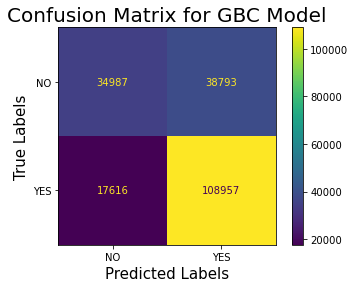

In [32]:
plt.figure(figsize=(15,12)) # Set the size of the plot
plot_confusion_matrix(gbc_best, X_test, y_test, display_labels=["NO","YES"]) # Plot the confusion Matrix
plt.title("Confusion Matrix for GBC Model", size=20) # Set the title of the plot
plt.xlabel("Predicted Labels", size=15) # Set x axis label
plt.ylabel("True Labels", size=15) # Set y axis label
plt.show() # Show the plot

**<font size="4">_On GBC model, accuracy on test set is coming out to be 71.85%_</font>**

## **Conclusions**

**<font size="3.5">1. This dataset has target column as 'reordered', i.e., we are predicting whether the customer will reorder or not. For that we built two classification models - RFC and GBC.</font>**     
**<font size="3.5">2. On Random Forest Classifier Model, our test accuracy is around ~70%.</font>**    
**<font size="3.5">3. On Gradient Boosting Classifier Model, our test accuracy is coming out to be 71.85%.</font>**    
**<font size="3.5">4. Both the models are performing fairly well on the sampled dataset. GBC model has comparatively higher accuracy than RFC model.</font>**     
**<font size="3.5">5. For future, we can add more data points to the model. This will ensure more accurate prediction of 'reordered' label.</font>**     

## **References**

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
- https://www.kaggle.com/c/instacart-market-basket-analysis/data
- https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2